This is an example of how to plot the standford bunny in matplotlib using glm and plot_trisurf

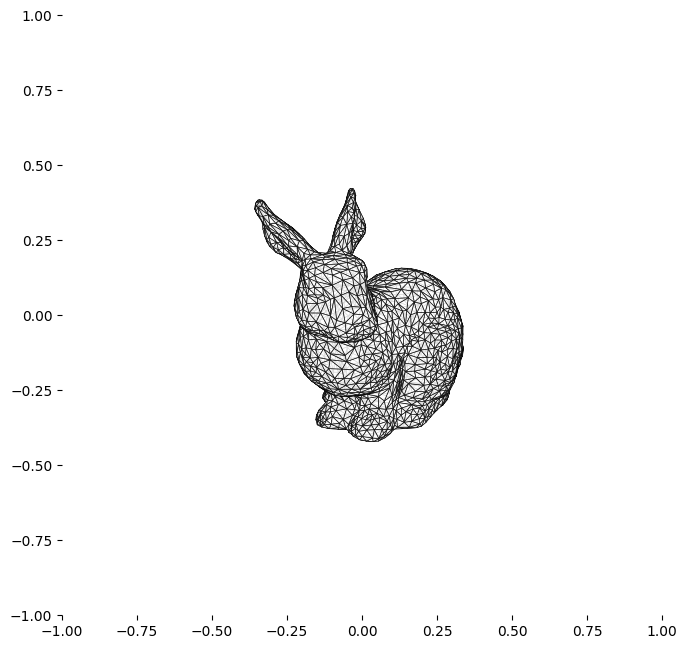

In [1]:
import meshio
import glm
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection


mesh = meshio.read("bunny.obj")
vertices, indices = mesh.points, mesh.cells[0].data

# 2. Create transform
M = glm.perspective(50, 1, 1, 100) @ glm.translate((0.1, -0.45, -2.5))
M = M @ glm.xrotate(20) @ glm.yrotate(45) @ glm.scale((5, 5, 5))

# 3. Apply transform
vertices = glm.to_vec3(glm.to_vec4(vertices) @ M.T)

# 4. Generate and sort faces
faces = vertices[indices]
faces = faces[np.argsort(-faces[..., 2].mean(axis=1))]

# 5. Render
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0, 0, 1, 1], aspect=1, frameon=False, xlim=[-1, +1], ylim=[-1, +1])
ax.add_collection(
    PolyCollection(
        faces[..., :2], alpha=0.85, linewidth=0.5, facecolor="white", edgecolor="black"
    )
)
plt.show()

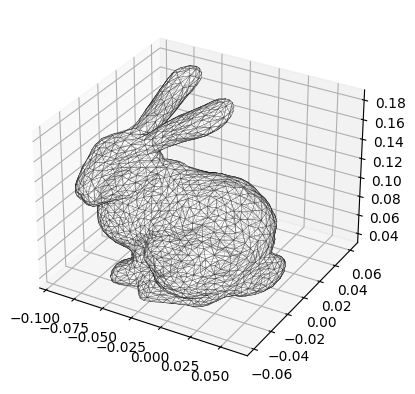

In [1]:
import meshio

import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

# Read the mesh from the OBJ file
mesh = meshio.read("bunny.obj")

# Extract vertices and faces
vertices = mesh.points
faces = mesh.cells_dict["triangle"]  # Use this line instead to extract the faces

rotation = R.from_euler("x", 90, degrees=True)
vertices_rotated = rotation.apply(vertices)

# Vertices' x, y, and z components after rotation
x = vertices_rotated[:, 0]
y = vertices_rotated[:, 1]
z = vertices_rotated[:, 2]

# Create a 3D plot
ax = plt.figure().add_subplot(projection="3d")

# Plot the surface using plot_trisurf with alpha set to a value between 0 and 1
ax.plot_trisurf(
    x,
    y,
    z,
    triangles=faces,
    linewidth=0.3,
    antialiased=True,
    alpha=0.5,
    facecolor="white",
    edgecolor="black",
)

plt.show()